## Title: Supervised Machine Learning - Simple Linear Regression
### Author: Brett Neely
#### GitHub Project Link: https://github.com/bncodes19/datafun-07-ml

In [58]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

#### Calculate Celsius and plot Celsius in relation to Farenheit

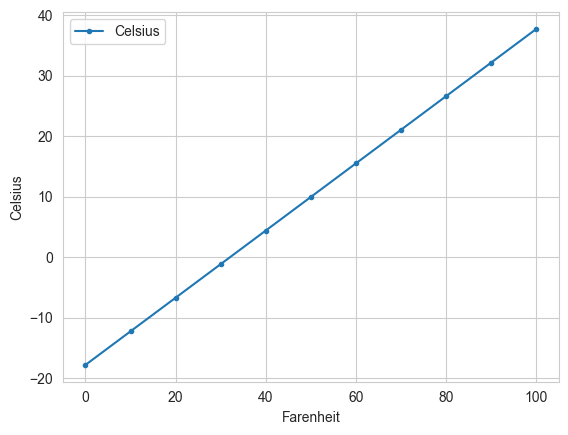

In [59]:
# Calculate Celsius temperature
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

# Plot Celsius in relation to Farenheit
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

#### Section 1 - Data Acquisition

In [60]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

#### Section 2 - Data Inspection

In [61]:
nyc_df.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [62]:
nyc_df.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Section 3 - Data Cleaning

In [63]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']
nyc_df.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [64]:
nyc_df.Date.dtype

dtype('int64')

In [65]:
nyc_df.Date = nyc_df.Date.floordiv(100)
nyc_df.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Section 4 - Descriptive Statistics

In [66]:
pd.set_option('display.precision', 2)
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

#### Section 5 - Build the Model

In [67]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [68]:
linear_regression.slope

0.014771361132966163

In [69]:
linear_regression.intercept

8.694993233674289

In [70]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

In [71]:
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

#### Section 7 - Visualization

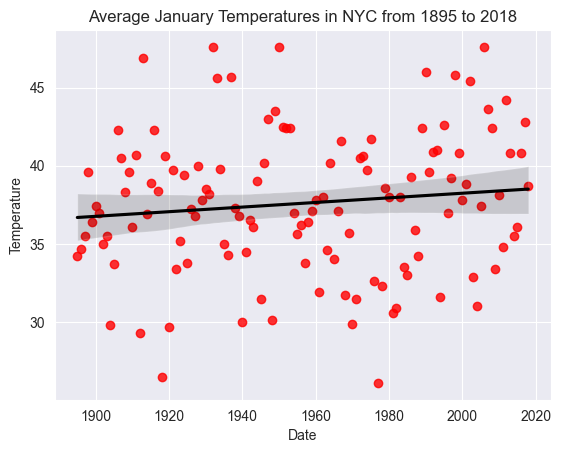

In [82]:
sns.set_style('darkgrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature, scatter_kws={"color": "red"}, line_kws={"color": "black"})
plt.title('Average January Temperatures in NYC from 1895 to 2018')
plt.show()